In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Navana/archive.zip

Archive:  /content/drive/MyDrive/Navana/archive.zip
  inflating: IMDB Dataset.csv        


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*  Read file by pandas
*  Tokenizing sentences by nltk
*  Take out first 100 sentences
import pandas as pd

df = pd.read_csv('data.csv')

print(df.to_string()) 




In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import nltk
from nltk.tokenize.toktok import ToktokTokenizer 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import librosa 
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')


In [ ]:
#special character removal
def remove_special_characters(text,remove_dig=True):
  seq=r'[^a-zA-Z0-9\s]'
  text=re.sub(seq,'',text); 
  return text

In [ ]:

#Stop word removal
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))
#Tokenization of text
tokenizer=ToktokTokenizer()
def remove_stopwords(text,is_lower_case=False):
  tokens=tokenizer.tokenize(text) 
  tokens=[token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens=[token for token in tokens if token not in stopword_list] 
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Clean the data

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.iloc[:, [0]]

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [ ]:
df['review'] = df['review'].apply(remove_special_characters)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(denoise_text)
# df=remove_stopwords(df.iloc[0:])
# df=denoise_text(df.iloc[0:])

In [ ]:
def dictionary(inp):
  j=0;
  dictionary_count = {}
  for i in range(len(inp)):        
    arr = [k for k in str(inp.iloc[i,[0]].values[0]).split() if k != 'br']
    
    dictionary_count[i] = len(arr)
      # j+=1;
  return dictionary_count

In [ ]:
#grouping data
# df1=df.groupby(["reviews"])
df_positive = df.loc[df['sentiment'] == "positive"] 
df1_p=df_positive.copy() 
df_negative = df.loc[df['sentiment'] == "negative"]

df1_n=df_negative.copy()
df_positive.reset_index(inplace=True,drop=True)
df_negative.reset_index(inplace=True,drop=True)

In [ ]:
positive_num = {}
negative_num = {}
from collections import OrderedDict
# positive_num = dictionary(df_positive).sort()
# negative_num = dictionary(df_negative).sort()
positive_num = dictionary(df_positive)
negative_num = dictionary(df_negative)

{0: 168,
 1: 84,
 2: 86,
 3: 125,
 4: 58,
 5: 75,
 6: 18,
 7: 27,
 8: 54,
 9: 65,
 10: 178,
 11: 30,
 12: 63,
 13: 280,
 14: 361,
 15: 246,
 16: 212,
 17: 371,
 18: 57,
 19: 121,
 20: 87,
 21: 110,
 22: 368,
 23: 237,
 24: 320,
 25: 92,
 26: 41,
 27: 304,
 28: 224,
 29: 38,
 30: 153,
 31: 122,
 32: 90,
 33: 71,
 34: 166,
 35: 151,
 36: 82,
 37: 82,
 38: 204,
 39: 101,
 40: 138,
 41: 274,
 42: 76,
 43: 71,
 44: 206,
 45: 117,
 46: 51,
 47: 99,
 48: 57,
 49: 51,
 50: 143,
 51: 66,
 52: 168,
 53: 58,
 54: 87,
 55: 73,
 56: 90,
 57: 74,
 58: 105,
 59: 228,
 60: 57,
 61: 145,
 62: 45,
 63: 143,
 64: 114,
 65: 171,
 66: 96,
 67: 110,
 68: 78,
 69: 56,
 70: 27,
 71: 199,
 72: 60,
 73: 308,
 74: 212,
 75: 130,
 76: 108,
 77: 68,
 78: 281,
 79: 108,
 80: 162,
 81: 403,
 82: 64,
 83: 25,
 84: 267,
 85: 125,
 86: 172,
 87: 30,
 88: 57,
 89: 64,
 90: 37,
 91: 38,
 92: 170,
 93: 137,
 94: 235,
 95: 126,
 96: 155,
 97: 144,
 98: 168,
 99: 94,
 100: 354,
 101: 70,
 102: 29,
 103: 62,
 104: 49,
 105: 

In [ ]:
positive_num= dict(sorted(positive_num.items(), key=lambda x:x[1]))
negative_num= dict(sorted(negative_num.items(), key=lambda x:x[1]))


In [ ]:
def originalvalue_extraction(df_forfinal,df_beforecopy,df_aftercopy):
  l=list(df_forfinal.keys())[:14]
  newlist = []
  finalpositive_list=[]
  for x in l:
    string=df_beforecopy.loc[x]
    s=string["review"]
    newlist.append(df_aftercopy['review'].loc[lambda x: x==s].index[0])

  # print(newlist)
  df_1=pd.read_csv('IMDB Dataset.csv')
  for x in newlist:
     finalpositive_list.append(df_1['review'][x])
  return(finalpositive_list)

In [ ]:
orignal_pos=originalvalue_extraction(positive_num,df_positive,df1_p)
orignal_neg=originalvalue_extraction(negative_num,df_negative,df1_n)
print(orignal_pos)
print(orignal_neg)

['This is a great movie. Too bad it is not available on home video.', 'Brilliant and moving performances by Tom Courtenay and Peter Finch.', 'Adrian Pasdar is excellent is this film. He makes a fascinating woman.', 'This is a good film. This is very funny. Yet after this film there were no good Ernest films!', "I don't know why I like this movie so well, but I never get tired of watching it.", 'Just love the interplay between two great characters of stage & screen - Veidt & Barrymore', 'This is the definitive movie version of Hamlet. Branagh cuts nothing, but there are no wasted moments.', "Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It's my favorite episode of Smallville! ! ! ! ! ! ! !

In [ ]:
from collections import Counter
count = Counter(positive_num.values())
count = dict(count)
print(positive_num.values())
count1=Counter(negative_num.values())
count1=dict(count1)

# print(Counter(positive_num.values()))

dict_values([6, 7, 7, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 

In [ ]:
#draw the graph from teh dictionary named: "count"


def graph(df):
  keys = list(df.keys())
  values = list(df.values())

  plt.bar(keys, values,color = "blue")
  plt.show()

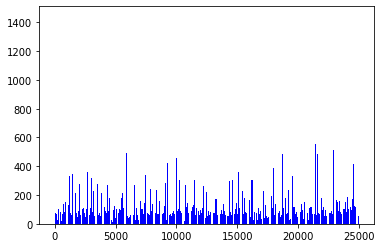

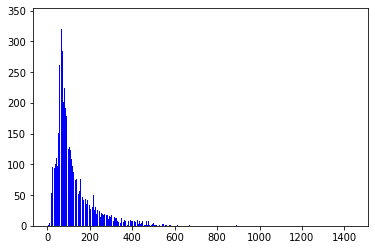

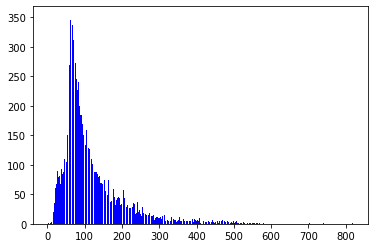

In [ ]:
graph(positive_num)
graph(count)
graph(count1)

Removing punctuations and also entity extraction to minimize the sentences. 

In [ ]:
!pip install datasets>=1.18.3
!pip install transformers==4.11.3
!pip install librosa
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from IPython.display import Audio, display

# var=Audio('/content/drive/MyDrive/Audios/NEG_AUD_1.m4a')

In [ ]:
# from seaborn import sns

sns.set_theme(style="white",palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
audio_files=glob('/content/drive/MyDrive/Audios/*.m4a')


In [ ]:
#Play audio file
ipd.Audio(audio_files[0])

You have only taken 0th file?

In [ ]:
y,sr=librosa.load(audio_files[0])
print(f'y:{y[:10]}')
print(f'shape y:{y.shape}')
print(f'sr:{sr}')

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y:(131584,)
sr:22050


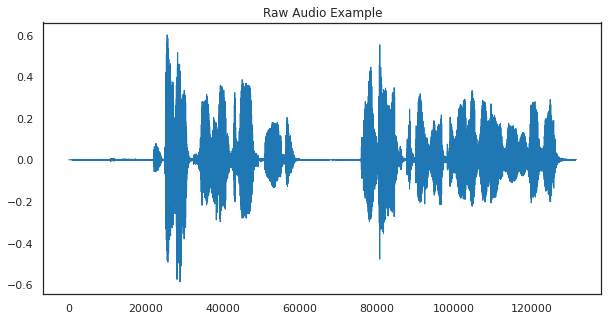

In [ ]:
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[0])
plt.show()

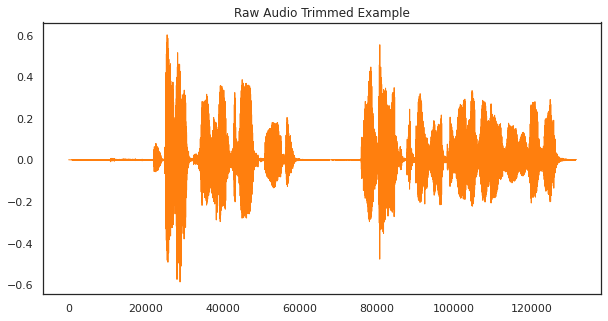

In [ ]:
y_trimmed,_=librosa.effects.trim(y,top_db=20)
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                  color=color_pal[1])
plt.show()

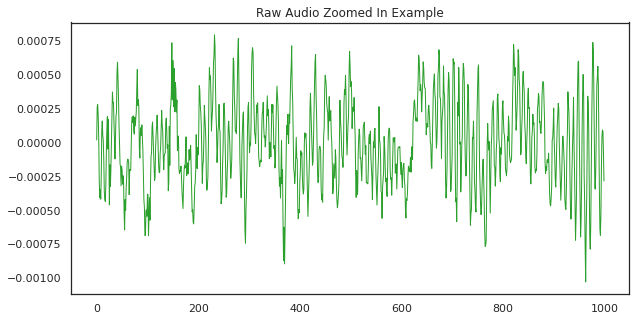

In [ ]:

pd.Series(y[20000:21000]).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                  color=color_pal[2])
plt.show()

In [ ]:
D=librosa.stft(y)
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 258)

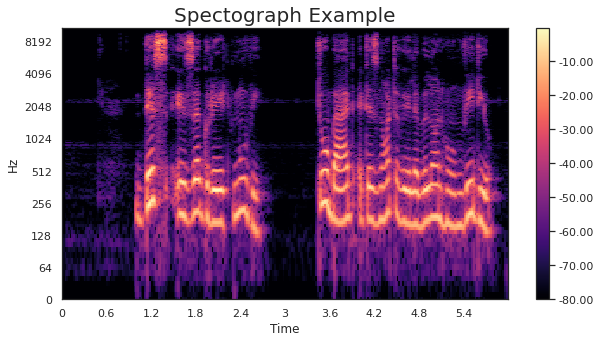

In [ ]:
#Plot the transformed audio data
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)

ax.set_title('Spectograph Example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [ ]:
S=librosa.feature.melspectrogram(y,sr=sr,n_mels=128*2)
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)

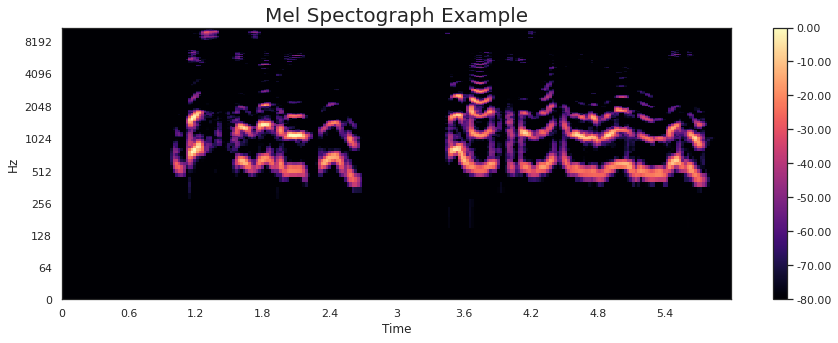

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
#plot the mel spectograph
img=librosa.display.specshow(S_db_mel,x_axis='time',y_axis='log',ax=ax)

ax.set_title('Mel Spectograph Example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [ ]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [ ]:


audio_dataset=tf.convert_to_tensor(S_db_mel)

In [31]:
#FINETUNING
#Installing necessary packages
%%capture
!pip install git+https://github.com/huggingface/datasets.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install soundfile
!pip install jiwer

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
# from datasets import load_dataset, load_metric

# timit = load_dataset("timit_asr")

# print(timit)

In [ ]:
from datasets import load_dataset, load_metric

timit = audio_files

In [ ]:
# !pip install speechrecognition
# !pip install Wav2Vec

In [ ]:
# !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# !pip install PyAudio

In [ ]:
# import torch
# from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
# import speech_recognition as sr
# # tokenizer=Wav2Vec2Processor('facebook/wav2vec2-base-960h')
# # model    =Wav2Vec2ForCTC('facebook/wav2vec2-base-960h')

In [ ]:
# r=sr.Recognizer()
# with sr.Microphone(sample_rate=16000) as source:
#   print('You can start speaking now...')
#   while True:
#     audio=r.listen(source)

#     # print('You said something now')